In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("SampleSuperstore.csv")

In [10]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
df.describe().drop('Postal Code',axis=1)

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

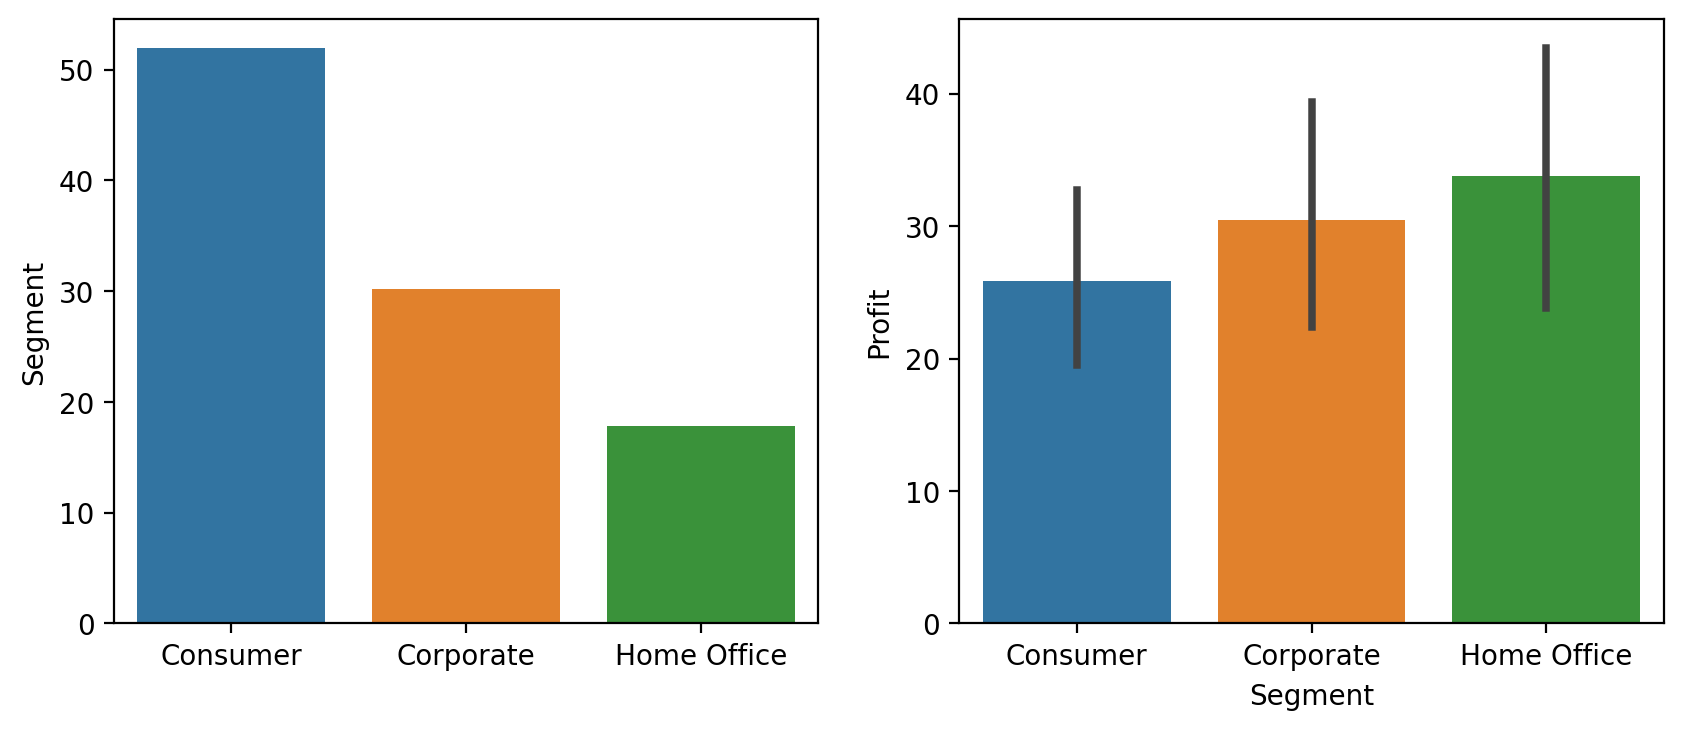

In [22]:
per_segment=(df['Segment'].value_counts()/len(df))*100
fig, ax =plt.subplots(1,2,figsize=(10,4),dpi=200)
sns.barplot(x=per_segment.index,y=per_segment,ax=ax[0])
sns.barplot(x=df['Segment'],y=df['Profit'],ax=ax[1])

<AxesSubplot:xlabel='Region', ylabel='Profit'>

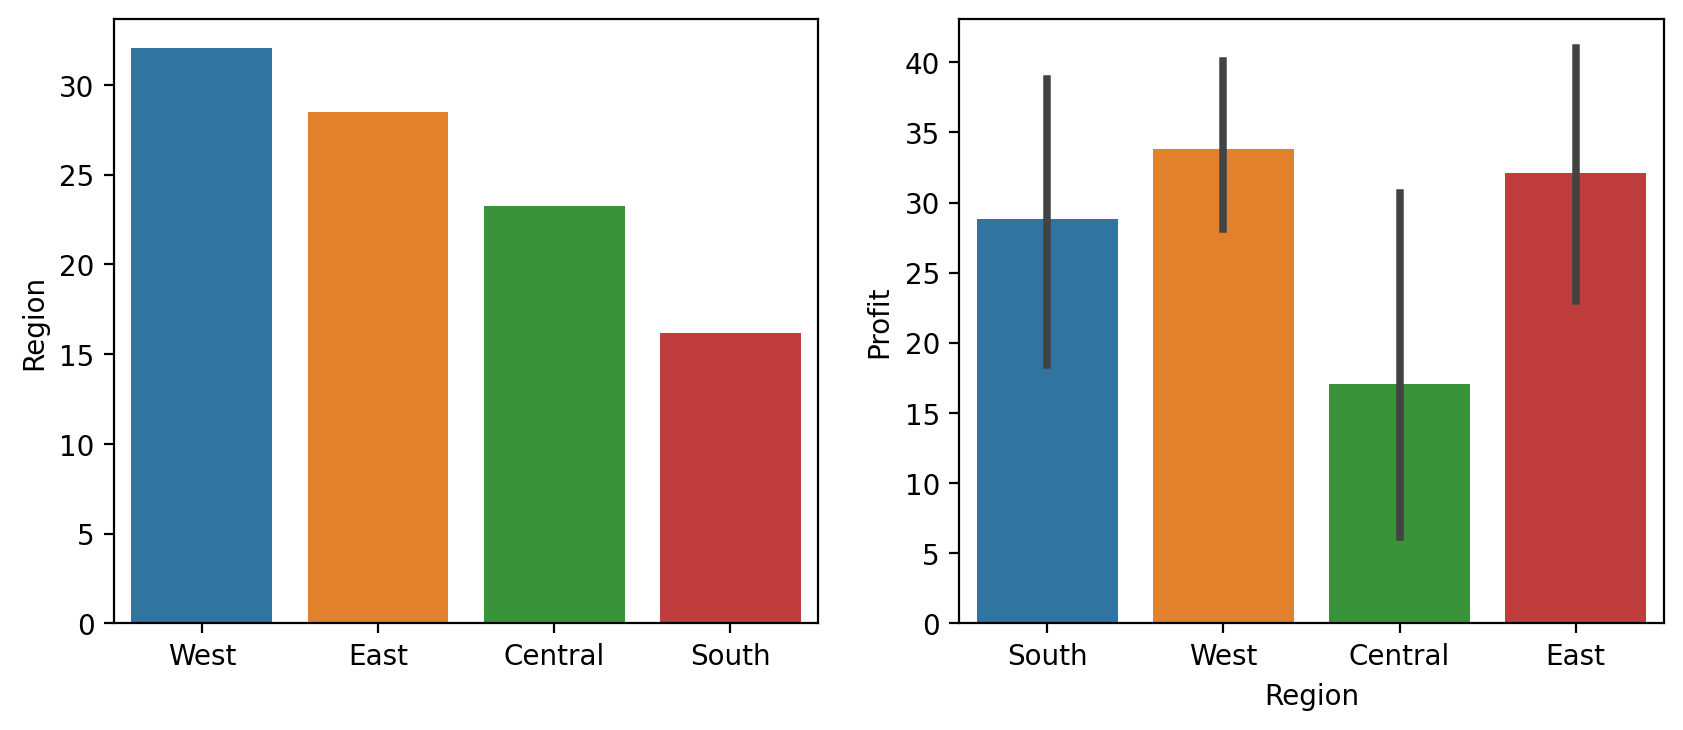

In [25]:
per_region=(df['Region'].value_counts()/len(df))*100
fig, ax =plt.subplots(1,2,figsize=(10,4),dpi=200)
sns.barplot(x=per_region.index,y=per_region,ax=ax[0])
sns.barplot(x=df['Region'],y=df['Profit'],ax=ax[1])

<AxesSubplot:xlabel='Category', ylabel='Profit'>

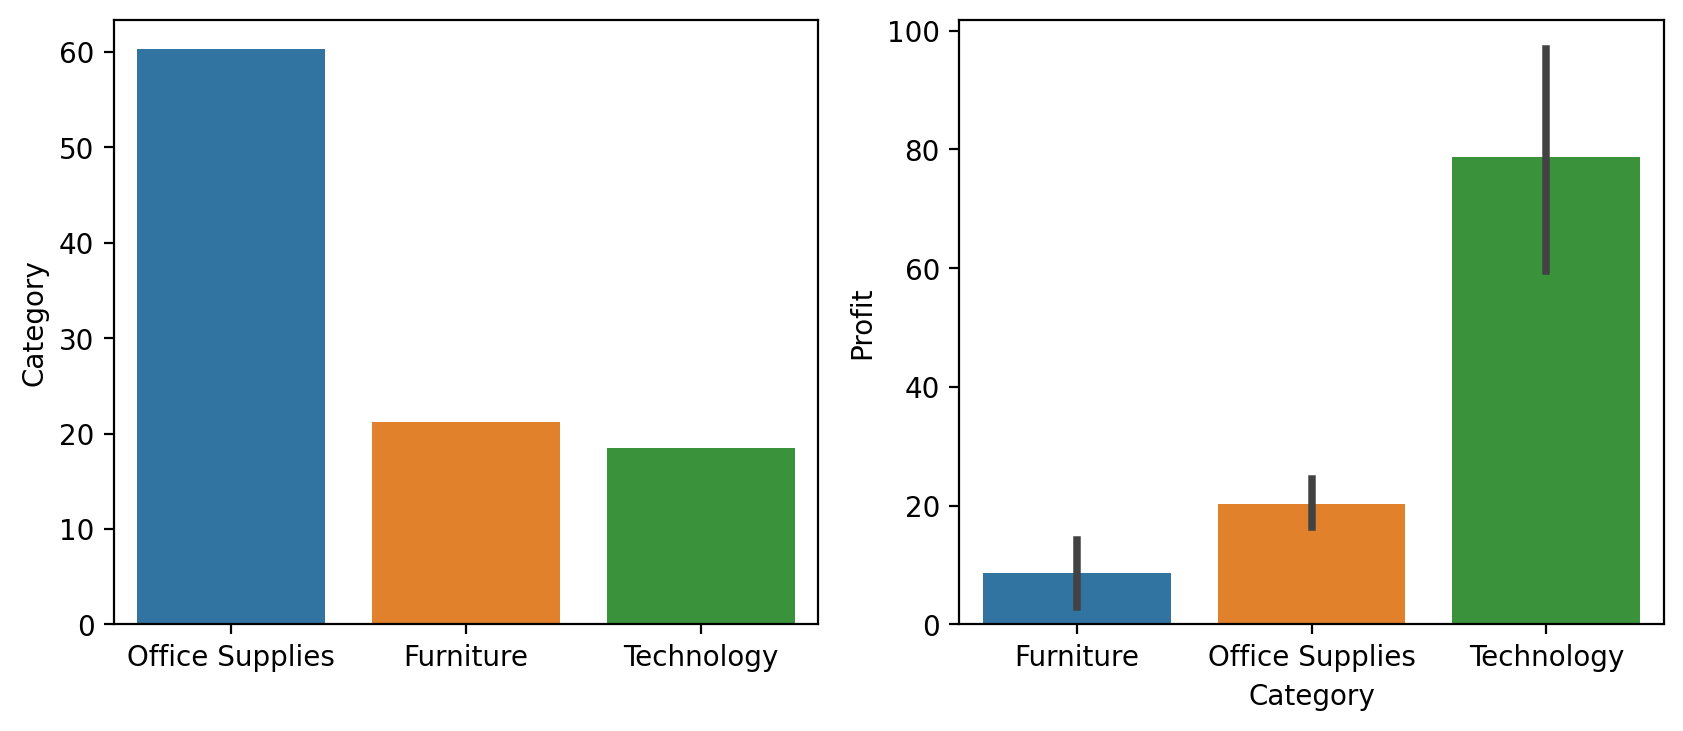

In [26]:
per_category=(df['Category'].value_counts()/len(df))*100
fig, ax =plt.subplots(1,2,figsize=(10,4),dpi=200)
sns.barplot(x=per_category.index,y=per_category,ax=ax[0])
sns.barplot(x=df['Category'],y=df['Profit'],ax=ax[1])

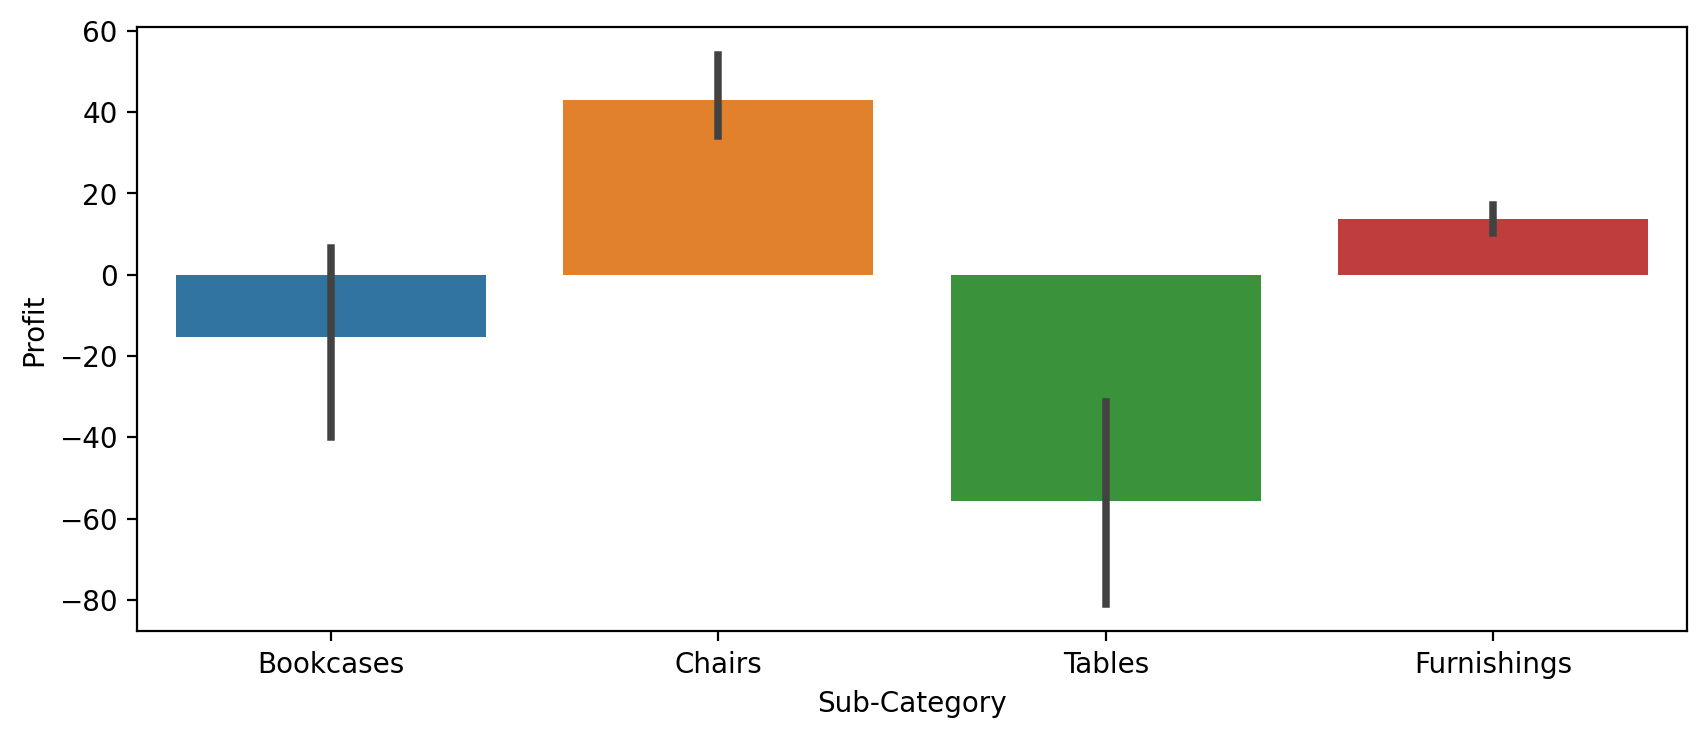

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=df[df['Category']=='Furniture'],x='Sub-Category',y='Profit')
None

# Conclusion: 
    (i)More Focus has to be given to Furniture category since they incur least profit. 
    (ii)Less profit in Furniture is caused by Bookcases and Tables as their profit margin is less than 0.

# Reasons

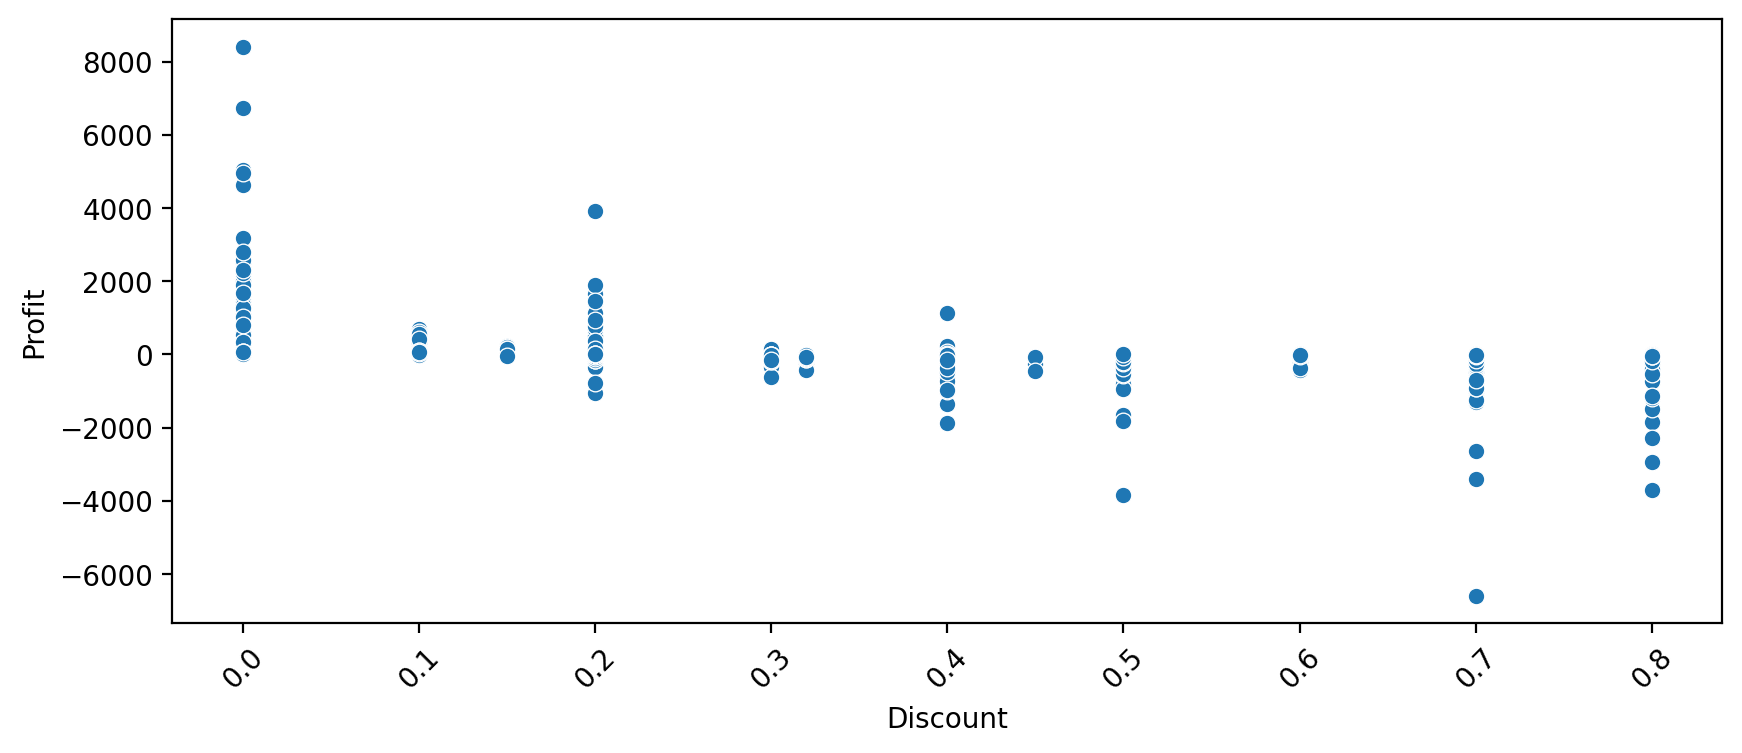

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Discount',y='Profit')
plt.xticks(rotation=45)
None

<Figure size 2000x800 with 0 Axes>

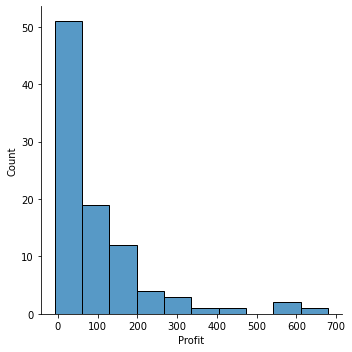

In [44]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df[df['Discount']==0.1],x='Profit',bins=10)

<Figure size 2000x800 with 0 Axes>

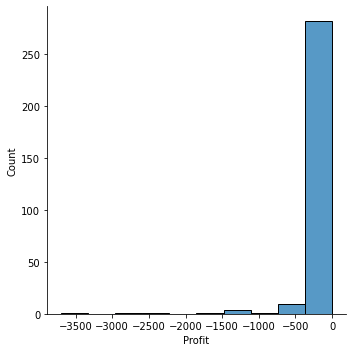

In [49]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df[df['Discount']==0.8],x='Profit',bins=10)

Conclusion:
    More Discounts cause less profit

<AxesSubplot:xlabel='Discount', ylabel='Density'>

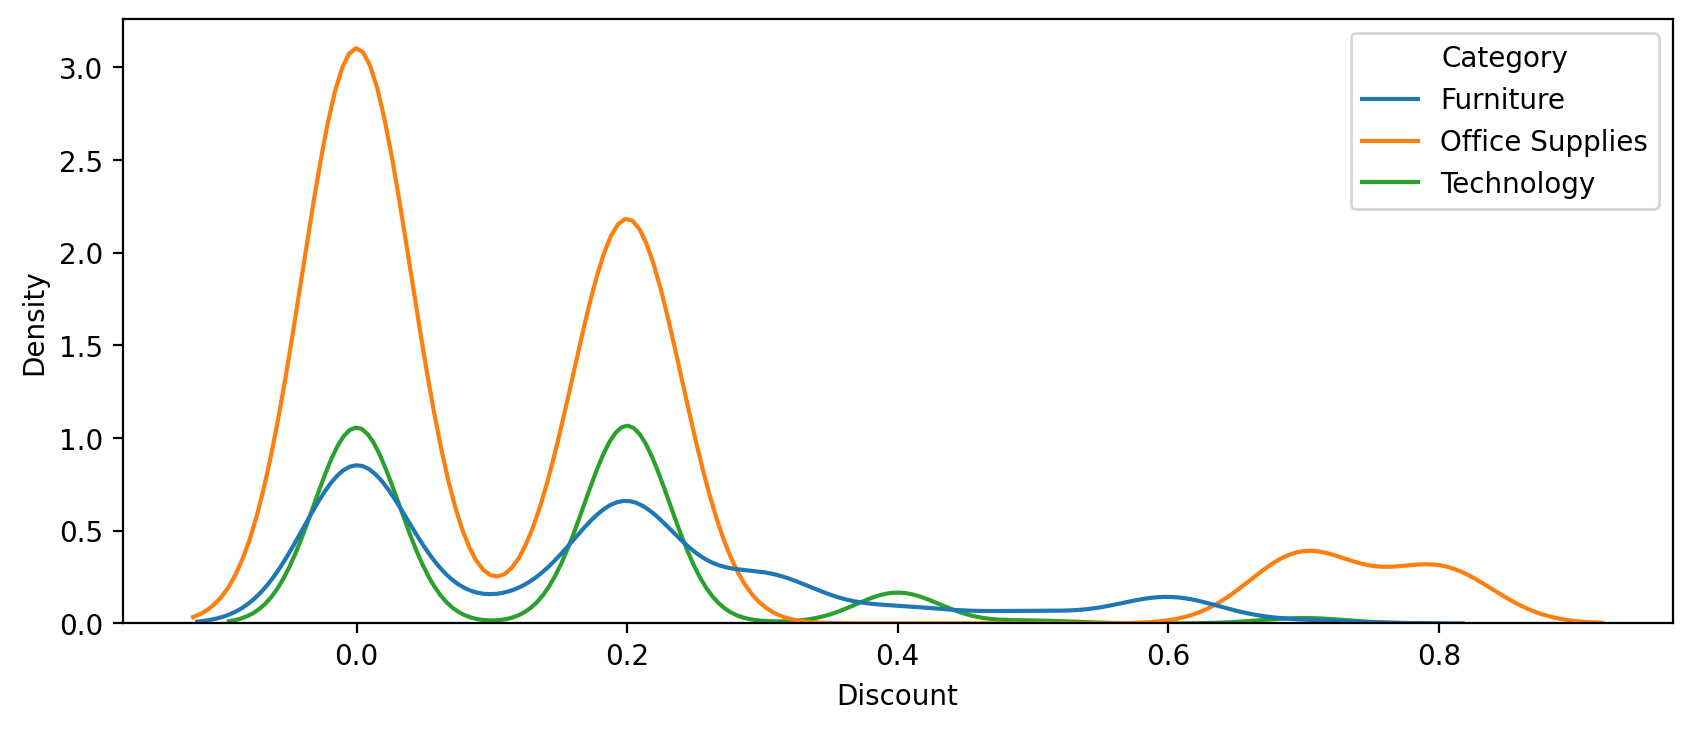

In [51]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=df,x='Discount',hue='Category')

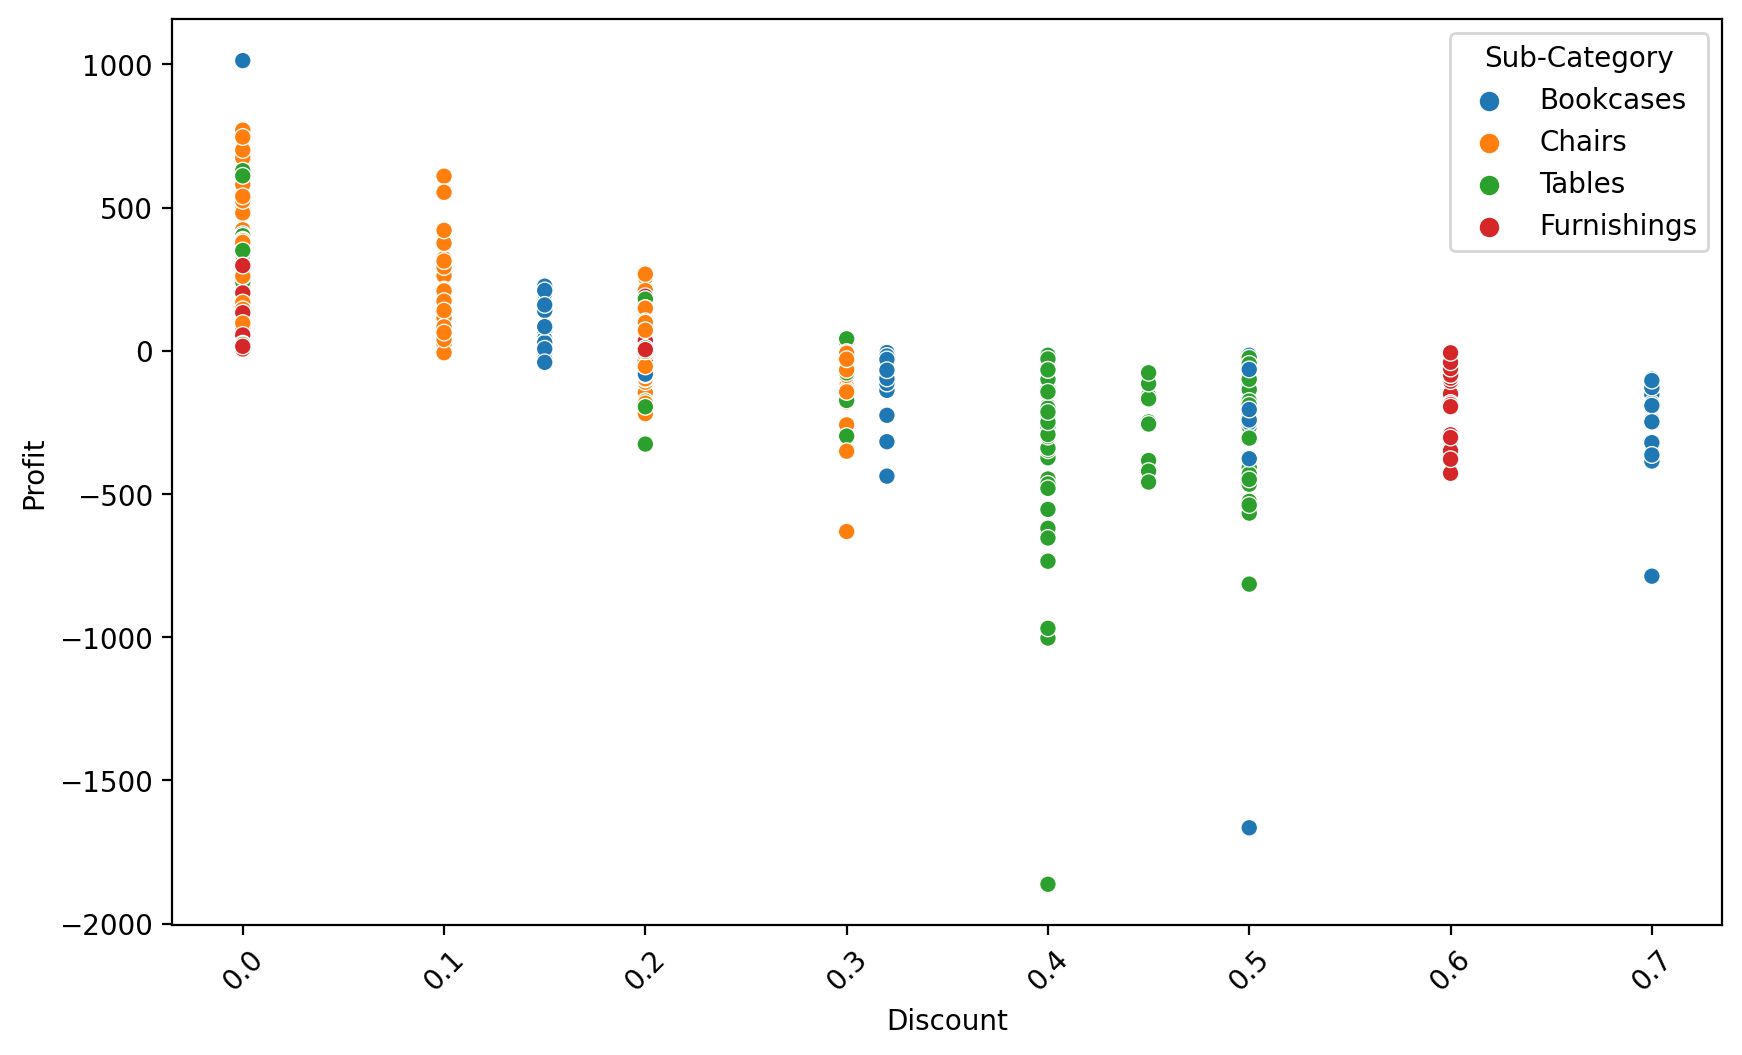

In [35]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df[df['Category']=='Furniture'],x='Discount',y='Profit',hue='Sub-Category')
plt.xticks(rotation=45)
None

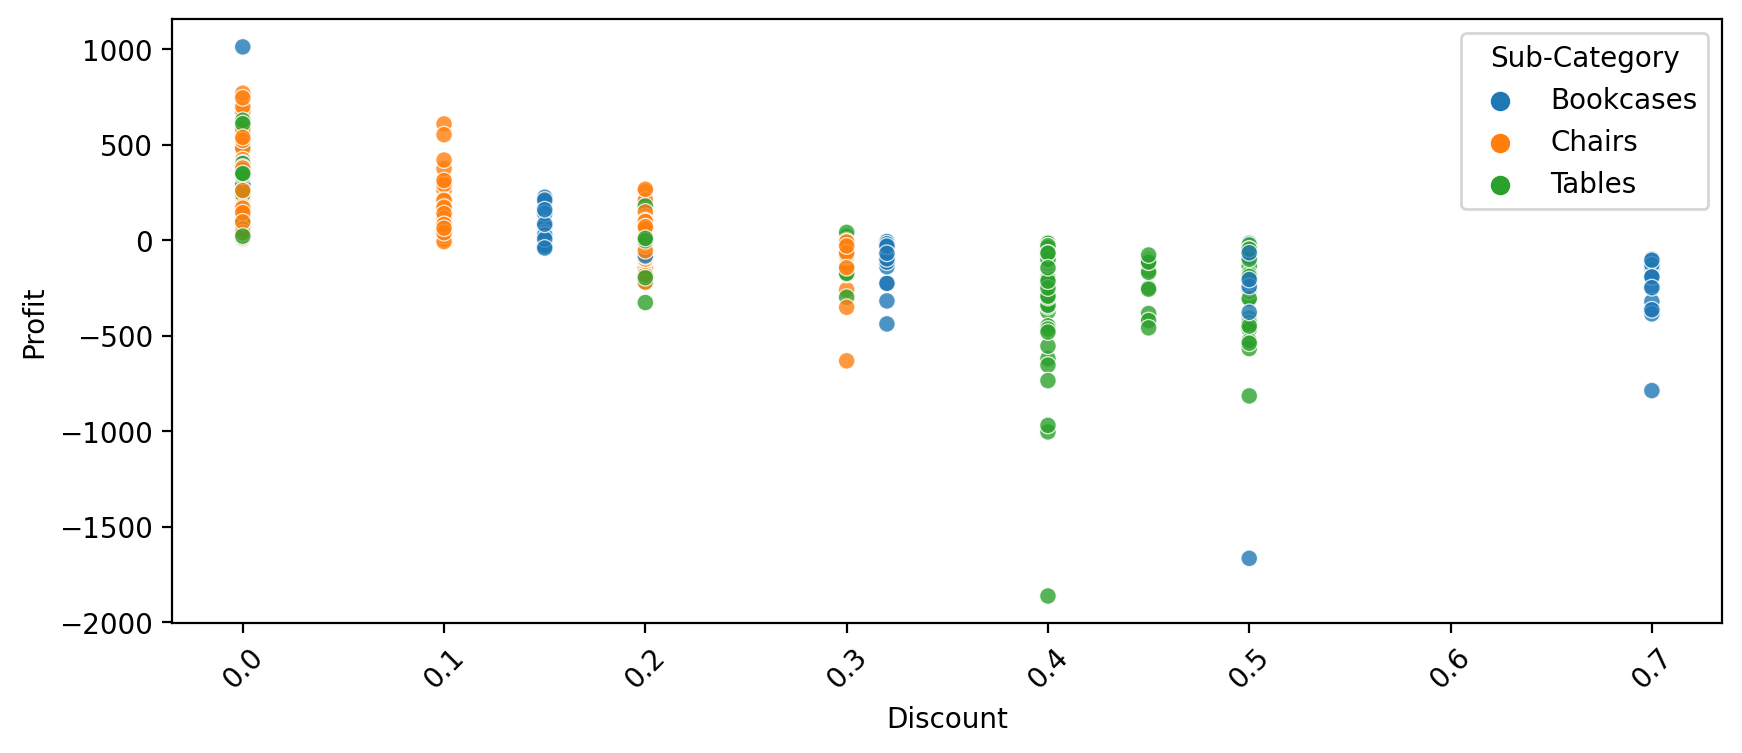

In [50]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df[(df['Sub-Category']=='Chairs')|(df['Sub-Category']=='Tables')|(df['Sub-Category']=='Bookcases')],x='Discount',y='Profit',alpha=0.8,hue='Sub-Category')
plt.xticks(rotation=45)
#plt.legend(loc=(1.1,0))
None

Tables and Bookcases are heavily discounted than chairs and this results in loss

In [52]:
temp=df.groupby('Discount').mean().drop(['Postal Code','Quantity'],axis=1)

In [53]:
temp

,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


<AxesSubplot:xlabel='Discount'>

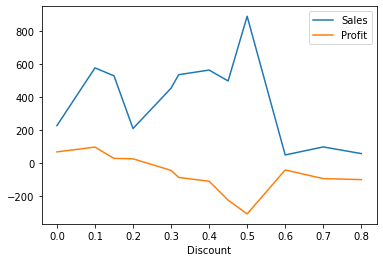

In [54]:
temp.plot()

# Solution:
    (i)optimal discount for most profit=10%
    (ii)Discounts should not exceed 20% 